In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from tools import tool

#统计不同行业中招聘岗位的数量

#公司数据
com_industry_sql="""
    SELECT com_md5,com_industry FROM zhilian_company
"""
industry_data=pd.read_sql(com_industry_sql, tool.get_connnect())
industry_data.tail()

,com_md5,com_industry
79866,fffe754783e0cdb5af279aedde59d9f5,电子技术/半导体/集成电路
79867,fffef0b0260cc3e64fbb5a46e4fc0694,快速消费品（食品/饮料/烟酒/日化）
79868,ffff349adef75ed6a9bffcc64059da16,互联网/电子商务
79869,ffff5e817d44e50ce6f5ea632d66cbea,家居/室内设计/装饰装潢
79870,ffffd8d811735b8d797a8eeffb816016,基金/证券/期货/投资


In [19]:
#岗位数据
job_recruit_num_sql="""
    SELECT com_md5,recruit_num FROM zhilian_job
"""
recruit_num_data=pd.read_sql(job_recruit_num_sql,tool.get_connnect())
recruit_num_data.tail()

,com_md5,recruit_num
427686,c91a5472f3d4d9e698fd4d088ef06484,1
427687,5629ba904e1fb9bef8a6a167978c52b0,5
427688,daa09a1b8527aaf4fedad0c885c46884,2
427689,ea488bed33c3e7195d89a64c4f14f51a,10
427690,ea488bed33c3e7195d89a64c4f14f51a,10


In [20]:
#合并数据
merge_res=pd.merge(recruit_num_data,industry_data,on='com_md5')
res_grouped=merge_res.groupby('com_industry')
output=res_grouped.sum().sort_values(by='recruit_num',ascending=False)
output

,recruit_num
com_industry,
互联网/电子商务,389534
房地产/建筑/建材/工程,302704
教育/培训/院校,206123
快速消费品（食品/饮料/烟酒/日化）,167907
医药/生物工程,123510
基金/证券/期货/投资,111007
专业服务/咨询(财会/法律/人力资源等),104135
计算机软件,98303
酒店/餐饮,78330


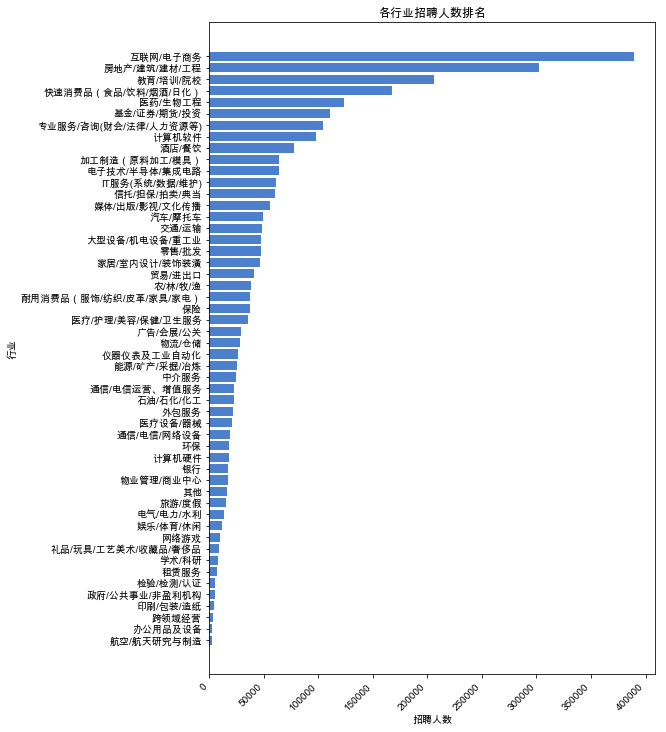

In [40]:
#预览数据
#output.plot()

#绘制条状图
fig,ax=plt.subplots(figsize=(8, 12))

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

#设置背景
#print(plt.style.available)
#['_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2']
# plt.style.use('seaborn-white')

#加载数据
index=list(reversed(range(len(output.index))))
plt.barh(index,output['recruit_num'],color=(0.3,0.5,0.8))

ax.set_yticklabels(output.index)
ax.set_yticks(index)
#设置lable旋转
labels=ax.get_xticklabels()
plt.setp(labels,rotation=45,horizontalalignment='right')

#设置标题等
ax.set(xlabel='招聘人数', ylabel='行业',title='各行业招聘人数排名')

plt.show()

#保存图片
fig.savefig('{}.png'.format(ax.get_title()), transparent=False, dpi=80, bbox_inches="tight")